# SALib Validation Files
This outputs files from SALib delta analysis with Ishigami function.

## Set Up

In [19]:
from SALib.sample import latin
from SALib.analyze import delta
from SALib.test_functions import Ishigami

from scipy.stats import norm, gaussian_kde, rankdata

import numpy as np
import csv

from SALib.util import read_param_file, ResultDict

#extra plotting
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [21]:
# SHORT EXAMPLE

# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

# Generate samples
param_values = latin.sample(problem, 1000)

# Run model (example)
Y = Ishigami.evaluate(param_values)

# Perform analysis
Si = delta.analyze(problem, param_values, Y, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])


       delta  delta_conf        S1   S1_conf
x1  0.184538    0.019386  0.273299  0.043971
x2  0.268585    0.022818  0.304021  0.045015
x3  0.163635    0.018932  0.003633  0.012597
[0.27329922 0.30402093 0.00363329]


In [22]:
# CONFIDENCE INTERVALS

print (Si['S1_conf'])
print (Si['delta_conf'])

[0.04397055 0.04501476 0.01259701]
[0.01938632 0.02281832 0.0189321 ]


### 1. Sampling

In [23]:
# Define the model inputs
problem = {
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
}

N = 1000
D = problem['num_vars']

In [24]:
# Generate samples
param_values = latin.sample(problem, N)

In [26]:
# print csv for comparison
path = "../data/delta/py_ishigami/py_samples.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(param_values)

### Sampling Plotting

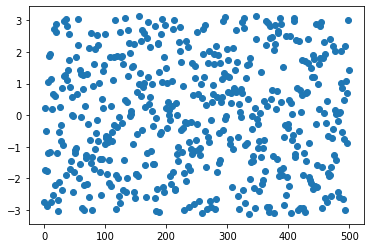

In [27]:
#distribution of sample
delta_sample= {'id': range(500), 'x1': param_values[0:500,0], 'x2': param_values[0:500,1], 'x3': param_values[0:500,2]}
df = pd.DataFrame(delta_sample)
plt.scatter(df['id'], df['x1'])
plt.show()

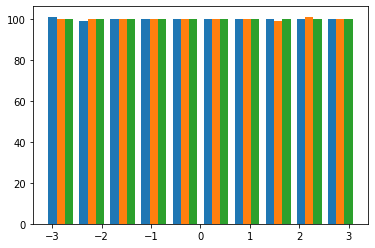

In [28]:
plt.hist(param_values)
plt.show()

### 2. Analyze

In [29]:
# Run model (example)

Y = Ishigami.evaluate(param_values)

In [30]:
# print csv for comparison

path = "../data/delta/py_ishigami/py_ishigami.csv"

with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(Y)):
        wr.writerow([Y[i]])

In [31]:
# Perform analysis

Si = delta.analyze(problem,param_values, Y, print_to_console= False, conf_level = 0.95, num_resamples = 1000)

print(Si['delta'])
print(Si['delta_conf'])
print()
print()
print(Si['S1'])
print(Si['S1_conf'])

[0.19791558 0.27548093 0.1309249 ]
[0.02109076 0.02222317 0.01936814]


[0.3041558  0.34670966 0.00873857]
[0.04108562 0.04916646 0.01607988]


In [32]:
# variables for indices

firstorder = Si["S1"]
delta = Si["delta"]
firstorder_conf = Si["S1_conf"]
delta_conf = Si["delta_conf"]


In [33]:
# print csv of indices for comparison 
        
path = "../data/delta/py_ishigami/py_firstorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder)):
        wr.writerow([firstorder[i]])

path = "../data/delta/py_ishigami/py_delta.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(delta)):
        wr.writerow([delta[i]])
        
# print csvs of CIs for comparisons

path = "../data/delta/py_ishigami/py_firstorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder_conf)):
        wr.writerow([firstorder_conf[i]])
        
path = "../data/delta/py_ishigami/py_delta_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(delta_conf)):
        wr.writerow([delta_conf[i]])
        

### Analyze Plotting

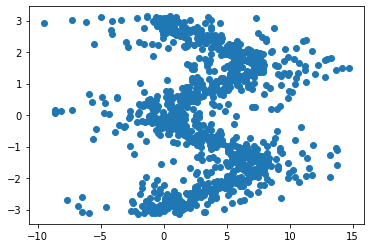

In [34]:
#simple scatter
plt.scatter(Y, param_values[:,1])
plt.show()

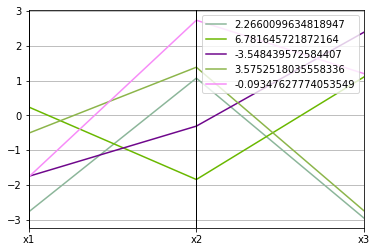

In [35]:
#parallel coordinates (1) 
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/
d = {'output':Y[0:5], 'x1': param_values[0:5,0], 'x2': param_values[0:5,1], 'x3': param_values[0:5,2]}
df = pd.DataFrame(d)
pd.plotting.parallel_coordinates(df, 'output')

plt.show()

In [36]:
#parallel coordinates (2)
#https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


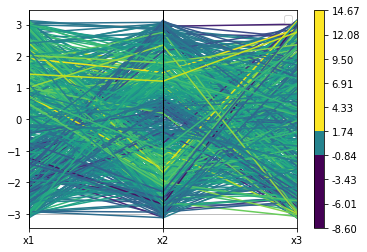

In [37]:
d = {'output':Y[0:500], 'x1': param_values[0:500,0], 'x2': param_values[0:500,1], 'x3': param_values[0:500,2]}
df = pd.DataFrame(d)
parallel_coordinates(df, 'output', colormap="viridis");

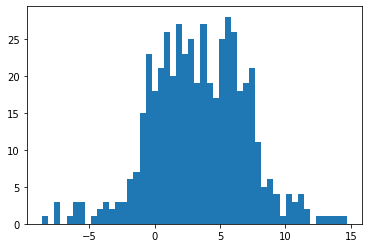

In [38]:
# histogram of output 
plt.hist(df['output'], 50)
plt.show()